# Gold Price Prediction

## Work Flow
-> Gold Data -> Data Pre-Processing -> Data Visualization -> Training and Testing -> Model Training -> Model Prediction -> New Data input and prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
from sklearn import metrics

In [2]:
gold_data=pd.read_csv('gld_price_data.csv')

In [3]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
gold_data.shape

(2290, 6)

In [6]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


# Visualization of Data

In [9]:
corr=gold_data.corr()

C:\Users\Nishant Kumar\AppData\Local\Temp\ipykernel_19452\3667303805.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=gold_data.corr()


In [10]:
corr

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<AxesSubplot: >

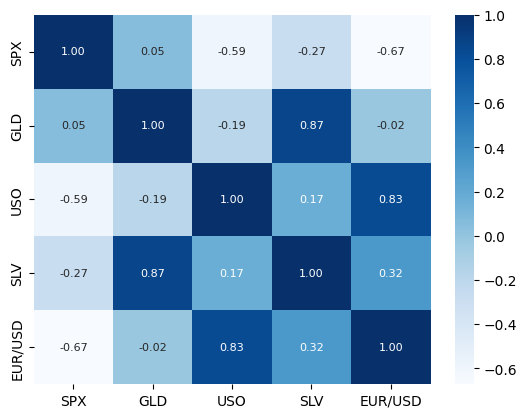

In [11]:
sns.heatmap(corr,fmt='0.2f',annot=True,annot_kws={"size":8},cmap="Blues")

In [12]:
print(corr['GLD'])   #### printing the correlation with 'GLD'  

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\Nishant Kumar\AppData\Local\Temp\ipykernel_19452\794836940.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='Green')  #### ploting the distplot of gold_data['GLD']


<AxesSubplot: xlabel='GLD', ylabel='Density'>

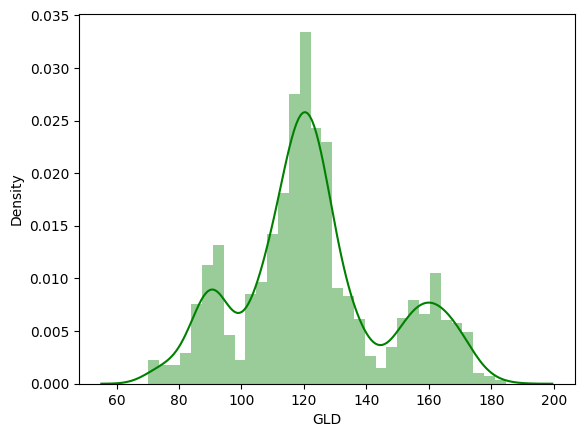

In [13]:
sns.distplot(gold_data['GLD'],color='Green')  #### ploting the distplot of gold_data['GLD']

# Splitting the Data

In [14]:
X=gold_data.drop(columns=['Date','GLD']) #### we manily focus on GLD(gold price) and removing the Date which is not in use
Y=gold_data['GLD']

In [15]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [16]:
Y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

# Splitting the data into Training and Testing

In [17]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [18]:
print(X.shape,X_train.shape,X_test.shape)

(2290, 4) (1832, 4) (458, 4)


# Training the Model

- RandomForestRegression

Sure! Imagine you’re playing a game where you have to guess the weight of a pumpkin. You can ask your friends for their guesses and then take the average of all their guesses to make your final guess. This is similar to how a Random Forest works. It’s like asking many decision trees (your friends) for their guesses (predictions) and then taking the average of all their guesses to make the final prediction.

- n_estimators:

is like the number of friends you ask for their guesses. The more friends you ask, the better your final guess will be. But if you ask too many friends, it will take a long time to get all their guesses.

In [28]:
random_forest=RandomForestRegressor(n_estimators=100)   #### n_estimators=100 is number of decision trees

In [29]:
random_forest.fit(X_train,Y_train)
X_train_prediction=random_forest.predict(X_train)
X_train_accuracy=metrics.r2_score(Y_train,X_train_prediction)
X_train_accuracy

0.9984755390921315

In [30]:
X_test_prediction=random_forest.predict(X_test)
X_test_accuracy=metrics.r2_score(Y_test,X_test_prediction)
X_test_accuracy

0.9893602242087827

## With the help of Graph we can find the Prediction and Actual value

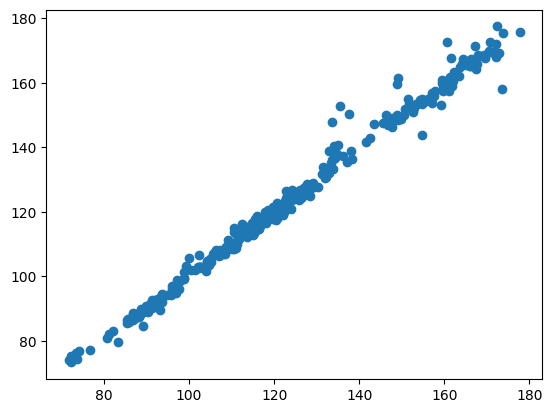

In [35]:
plt.scatter(Y_test,X_test_prediction)

# Prediction System

In [31]:
input_data=(976.289978,35.790001,13.52,1.421202)

input_data_asarray=np.asarray(input_data)

input_data_reshape=input_data_asarray.reshape(1,-1)

prediction=random_forest.predict(input_data_reshape)

print(prediction)


[93.01090108]


C:\Users\Nishant Kumar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
